# Classifiers

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#classifier methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Read data from csv files
x = pd.read_csv('/home/trabajo04/test_ypd/Datasets_features_removed/DrDoS_SSDP_features_removed.csv',engine="python")
y = pd.read_csv('/home/trabajo04/test_ypd/Datasets/DrDoS_SSDP_labels.csv',engine="python")

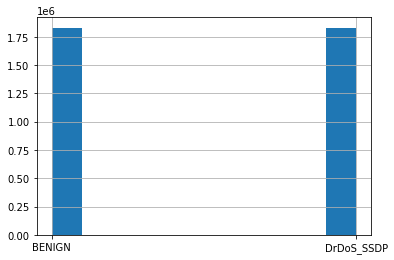

In [3]:
y = y['Label']
y.hist()

## Setup

In [4]:
#A dictionary of classifiers is created
#The key is the classifier name and the value is a list [Classifier,Parameters]
dict_classifiers = {}

dict_classifiers['SVM'] = [SVC(),
                           {
                              #'C': [1000,100,10,1,0.1,0.001,0.0001,0.00001], 
                              'kernel': ['rbf'],
                              #'probability':[False,True]                               
                            }
                          ]


dict_classifiers['LogisticRegression'] = [LogisticRegression(),
                                               {
                                                  'C': [0.001,0.0001,0.00001,0.000001,0.0000001], 
                                                  'solver': ['liblinear'],
                                                 'penalty':['l1','l2']
                                                 }
                                         ]



                                            
dict_classifiers['DecisionTree'] = [DecisionTreeClassifier(),
                                    {
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 10], 
                                        'min_samples_split': [2, 3],
                                        'min_samples_leaf': [100,200,300]  
                                    }
                                   ]

dict_MLPClassifierSSDP['MLPClassifier']=[MLPClassifier(hidden_layer_sizes=(38,2 )),
                                   {
                                       'alpha': [100,10,1,0.1,0.001]
                                   }
                                   
                                  ]

In [5]:
#Splitting dataset
x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

#Dataset is scaled to improve performance of several algorithms
scaled_X = StandardScaler().fit_transform(x)

#Splitting scaled dataset
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_X, y, stratify=y, test_size=0.3, random_state=0)


x_train = x_train_scaled.copy()
y_train = y_train_scaled.copy()
x_test = x_test_scaled.copy()
y_test = y_test_scaled.copy()


#Set number of folds for CV
folds=5

#Scoring to compare parameter combinations
scorer = make_scorer(accuracy_score)

#Resume of metrics for classifiers
df_resume_clf=pd.DataFrame(columns=['Classifier','F1','Accuracy','Recall','Precision', 'Confusion_Matrix'])

In [ ]:
for k, v in tqdm(dict_classifiers.items()):
    classifier_name = k
    classifier = v[0]
    parameters = v[1]
    print('Training {0} ....'.format(classifier_name))
    print("#" * 12 + '| Start Training: ' + classifier_name + ' |' + "#" * 12)
    classification = None
    confusion = None
    
        
    #Grid search
    grid_obj = GridSearchCV(classifier, parameters, cv=folds,scoring=scorer)
    grid_obj = grid_obj.fit(x_train, y_train)
    
    #Selection of the best combination of parameters
    best_clf = grid_obj.best_estimator_
    best_params=grid_obj.best_params_

    #Fit the best algorithm to the data. 
    best_clf.fit(x_train, y_train)
    
    #Getting the perdictions
    predict = best_clf.predict(x_test)
    
    #Metrics
    classification = classification_report(y_test, predict)
    confusion = confusion_matrix(y_test,predict)
    
    # Accuracy
    accuracy = round(accuracy_score(y_test, predict)*100,2)
    
    # Recall
    recall = round(recall_score(y_test, predict, average='macro')*100,2)
    
    # Precision
    precision = round(precision_score(y_test, predict, average='weighted')*100,2)
    
    # F1
    f1 = round(f1_score(y_test, predict, average='weighted')*100,2)
    
    print('F1-score:        {0}%'.format(f1))
    print('Accuracy:        {0}%'.format(accuracy))
    print('Recall:          {0}%'.format(recall))
    print('Precision:       {0}%'.format(precision))
    print('Classification Report:\n{0}'.format(classification))
    print('Confusion Matrix:\n{0}'.format(confusion))
    print('Best parameters:\n{0}'.format(best_params))
    
    print("#" * 12 + '| End Model: ' + classifier_name + ' |' + "#" * 12)
    
    df_resume_clf=df_resume_clf.append({'Classifier':classifier_name,
                                       'F1':f1,
                                       'Accuracy':accuracy,
                                       'Recall':recall,
                                       'Precision':precision,
                                       'Confusion_Matrix': confusion,
                                       'Parameters': best_params
                                       },
                                       ignore_index=True)

  0%|          | 0/7 [00:00<?, ?it/s]

Training SVM ....
############| Start Training: SVM |############


In [ ]:
df_resume_clf

In [ ]:
df_resume_clf.sort_values(by='F1',inplace=True)

In [ ]:
df_resume_clf.to_csv('/home/trabajo04/test_ypd/output/SSDP_output.csv', sep=';', encoding='utf-8',index=False)